In [6]:
###
## Analysis
#### Do advantages of ev's (better mileage and less emissions) effect their population among other vehicles 

import psycopg2
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
# Connect to the emissions database
conn1 = psycopg2.connect( host="database-2.c5go4e6kame4.us-east-1.rds.amazonaws.com",
                         database="postgres", user="postgres", password="javamylife", port="5432")
cursor1 = conn1.cursor()

# Connect to the population database
conn2 = psycopg2.connect( host="database-3.c5go4e6kame4.us-east-1.rds.amazonaws.com",
                         database="postgres", user="postgres", password="javamylife", port="5432")
cursor2 = conn2.cursor()

In [8]:
query1 = "SELECT * FROM car_details INNER JOIN emission_standard ON car_details.stnd = emission_standard.stnd where emission_standard.cert_region='CA'"
query2 = "SELECT * FROM electric_vehicles INNER JOIN counties ON electric_vehicles.county_id = counties.id where counties.state='CA'"

df1 = pd.read_sql(query1, conn1)
df2 = pd.read_sql(query2, conn2)

conn1.close()
conn2.close()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17280\2183875304.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17280\2183875304.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn2)


In [9]:
df1 = df1.loc[:, ~df1.columns.duplicated()]

df1 = df1.drop(columns=['underhood_id', 'stnd_description'])

In [10]:
df1.head(10)

,stnd,model,disp,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,city_mpg_alternate,hwy_mpg,hwy_mpg_alternate,cmb_mpg,cmb_mpg_alternate,greenhouse_gas_score,smart_way,comb_co2,comb_co2_alternate,cert_region
0,L3ULEV125,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,0.0,27.0,0.0,27.0,0.0,6.0,No,330.0,0.0,CA
1,L3ULEV125,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3.0,24.0,0.0,34.0,0.0,28.0,0.0,6.0,No,316.0,0.0,CA
2,L3ULEV125,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,0.0,27.0,0.0,23.0,0.0,5.0,No,387.0,0.0,CA
3,L3ULEV125,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3.0,23.0,0.0,33.0,0.0,27.0,0.0,6.0,No,330.0,0.0,CA
4,L3ULEV125,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,0.0,31.0,0.0,24.0,0.0,5.0,No,376.0,0.0,CA
5,L2ULEV125,ASTON MARTIN DB11,5.2,12.0,SemiAuto-8,2WD,Gasoline,small car,3.0,15.0,0.0,22.0,0.0,18.0,0.0,3.0,No,497.0,0.0,CA
6,L3SULEV30,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,small car,7.0,22.0,0.0,30.0,0.0,25.0,0.0,5.0,No,362.0,0.0,CA
7,L3ULEV70,AUDI A4 allroad quattro,2.0,4.0,AMS-7,4WD,Gasoline,station wagon,5.0,22.0,0.0,29.0,0.0,25.0,0.0,5.0,No,356.0,0.0,CA
8,L3ULEV125,AUDI A8 L,3.0,6.0,SemiAuto-8,4WD,Gasoline,large car,3.0,19.0,0.0,27.0,0.0,22.0,0.0,4.0,No,405.0,0.0,CA
9,L3ULEV125,AUDI RS 3,2.5,5.0,AMS-7,4WD,Gasoline,small car,3.0,19.0,0.0,28.0,0.0,22.0,0.0,4.0,No,397.0,0.0,CA


In [11]:
df2

,id,date,county_id,vehicle_primary_use_id,bev,phev,ev_total,non_ev_total,total_vehicles,percent_ev,id,name,state
0,1407,2019-10-31,549,5,1,0,1,206,207,0.48,549,Solano,CA
1,1411,2020-08-31,619,5,1,0,1,187,188,0.53,619,Fresno,CA
2,1415,2020-11-30,609,5,1,1,2,117,119,1.68,609,San Mateo,CA
3,1437,2022-11-30,489,5,4,6,10,754,764,1.31,489,Los Angeles,CA
4,1467,2021-02-28,539,5,14,4,18,2680,2698,0.67,539,San Diego,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,21758,2022-02-28,465,5,1,0,1,28,29,3.45,465,Santa Cruz,CA
1606,21763,2018-11-30,465,5,1,0,1,42,43,2.33,465,Santa Cruz,CA
1607,21767,2023-10-31,613,5,1,1,2,156,158,1.27,613,Kern,CA
1608,21777,2020-09-30,613,5,0,1,1,226,227,0.44,613,Kern,CA


In [12]:
df1['veh_class'].unique()

array(['small SUV', 'small car', 'station wagon', 'large car',
       'midsize car', 'standard SUV', 'special purpose', 'pickup',
       'minivan', 'van'], dtype=object)

In [13]:
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2[df2['date'] < '2021-01-01']

In [14]:
df1.columns

Index(['stnd', 'model', 'disp', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'city_mpg_alternate', 'hwy_mpg',
       'hwy_mpg_alternate', 'cmb_mpg', 'cmb_mpg_alternate',
       'greenhouse_gas_score', 'smart_way', 'comb_co2', 'comb_co2_alternate',
       'cert_region'],
      dtype='object')

In [15]:
df2.columns

Index(['id', 'date', 'county_id', 'vehicle_primary_use_id', 'bev', 'phev',
       'ev_total', 'non_ev_total', 'total_vehicles', 'percent_ev', 'id',
       'name', 'state'],
      dtype='object')

In [16]:
veh_specs = df1.groupby('fuel')[['comb_co2', 'comb_co2_alternate', 'hwy_mpg', 'cmb_mpg', 'cmb_mpg_alternate', 'city_mpg']].mean().reset_index()
veh_specs.iloc[3, 4] = veh_specs.iloc[3, 5]

veh_specs = veh_specs.drop(columns=['cmb_mpg_alternate', 'comb_co2_alternate'])

In [17]:
veh_specs

,fuel,comb_co2,hwy_mpg,cmb_mpg,city_mpg
0,Diesel,425.406250,28.437500,24.312500,21.843750
1,Ethanol/Gas,458.088235,16.823529,14.176471,12.558824
2,Gasoline,397.400000,28.053151,24.143014,21.780822
3,Gasoline/Electricity,169.695652,30.149068,71.950311,28.590062


In [18]:
veh_population = df2.groupby(df2['date'].dt.year)[['ev_total', 'non_ev_total']].sum().reset_index()

In [19]:
veh_population

,date,ev_total,non_ev_total
0,2017,407,91437
1,2018,568,88692
2,2019,844,93316
3,2020,1014,91378


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17280\3565381767.py:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(hue = veh_specs['fuel'], y = veh_specs['comb_co2'], palette=palette, ax = axes[0,0])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17280\3565381767.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(hue = veh_specs['fuel'], y = veh_specs['hwy_mpg'], palette=palette, ax = axes[0,1])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17280\3565381767.py:10: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(hue = veh_specs['fuel'], y = veh_specs['city_mpg'], palette=palette, ax = axes[1, 0] )
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17280\3565381767.py:13: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(hue = veh_specs['fuel'], y = veh_specs

Text(0, 0.5, 'Combined Mileage')

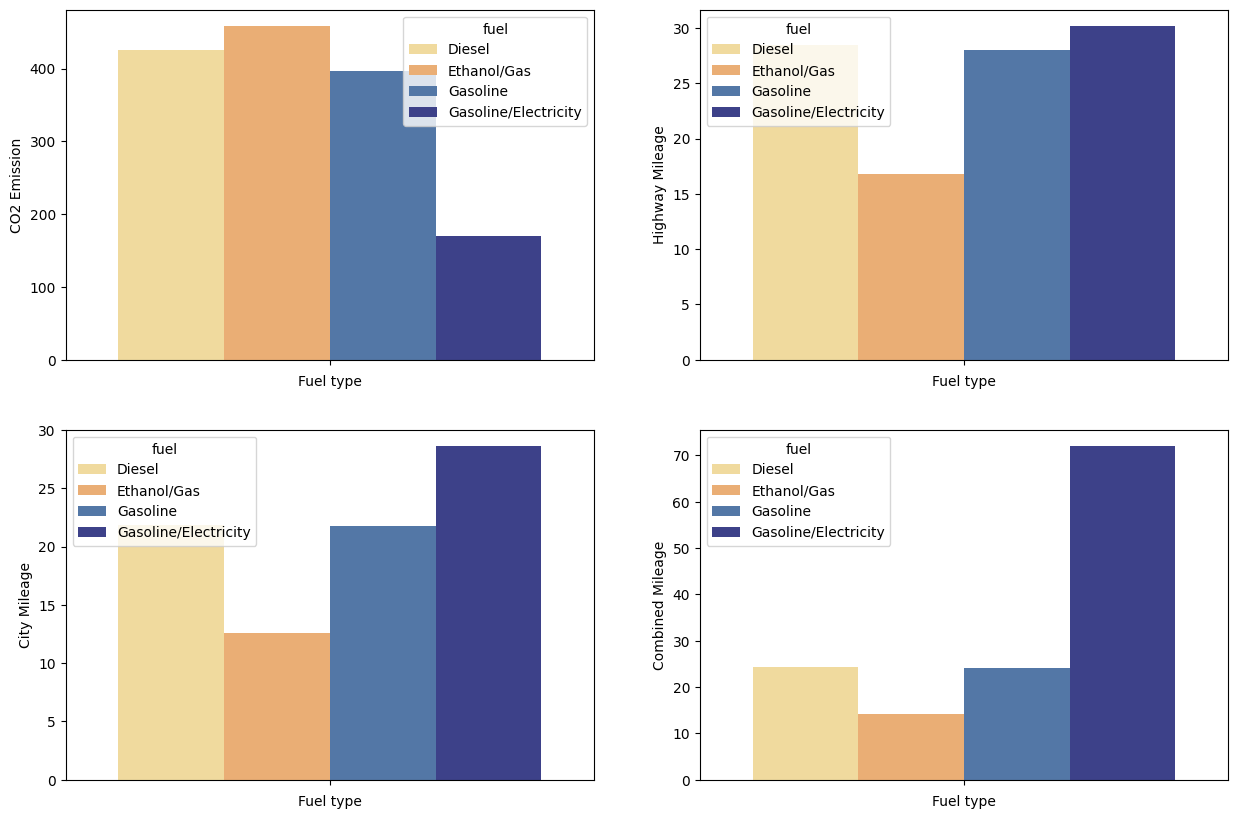

In [20]:
palette = ["#fee090", "#fdae61", "#4575b4", "#313695", "#e0f3f8", "#abd9e9", "#d73027", "#a50026"]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(hue = veh_specs['fuel'], y = veh_specs['comb_co2'], palette=palette, ax = axes[0,0])
axes[0, 0].set_xlabel("Fuel type")
axes[0, 0].set_ylabel('CO2 Emission')
sns.barplot(hue = veh_specs['fuel'], y = veh_specs['hwy_mpg'], palette=palette, ax = axes[0,1])
axes[0, 1].set_xlabel("Fuel type")
axes[0, 1].set_ylabel('Highway Mileage')
sns.barplot(hue = veh_specs['fuel'], y = veh_specs['city_mpg'], palette=palette, ax = axes[1, 0] )
axes[1, 0].set_xlabel("Fuel type")
axes[1, 0].set_ylabel('City Mileage')
sns.barplot(hue = veh_specs['fuel'], y = veh_specs['cmb_mpg'], palette=palette, ax = axes[1,1] )
axes[1, 1].set_xlabel("Fuel type")
axes[1, 1].set_ylabel('Combined Mileage')


Text(0.5, 1.0, 'EV population')

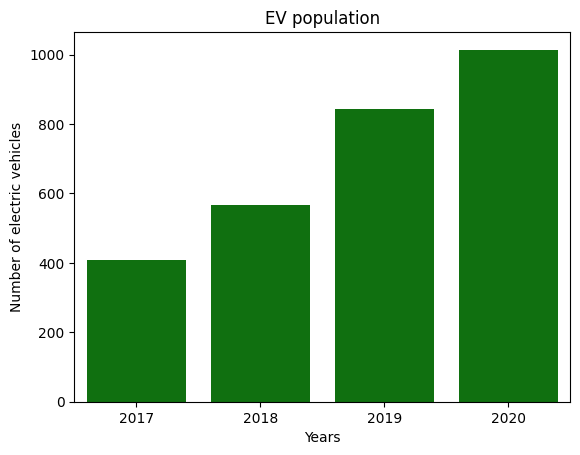

In [21]:
ax = sns.barplot(data=veh_population, x="date",y='ev_total', color='green')
ax.set_ylabel("Number of electric vehicles")
ax.set_xlabel("Years")
ax.set_title("EV population")

In [27]:
df2['date'] = pd.to_datetime(df2['date']).astype('int64') // 10**9

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17280\400481520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date']).astype('int64') // 10**9


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df2.drop(columns=['id', 'name', 'state', 'percent_ev'])
y = df2['percent_ev']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

rmse = mse**.5
print("R-squared:", r2)


Mean Squared Error: 0.006147764379084898
Root Mean Squared Error: 0.07840768061283855
R-squared: 0.998075720999834


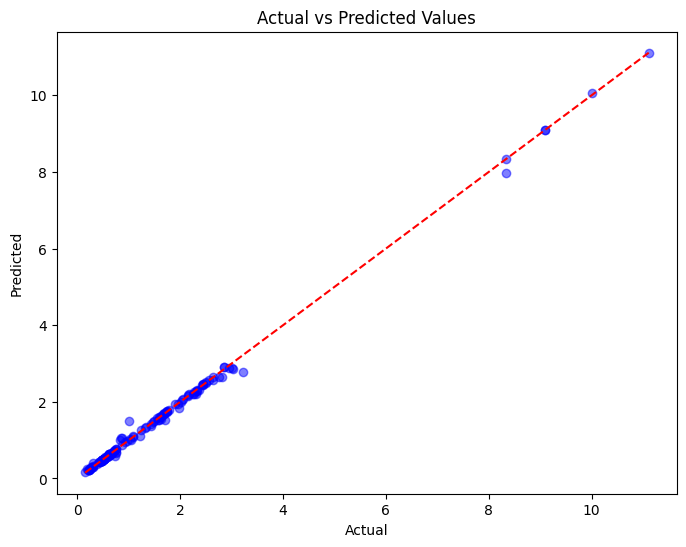

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()